In [1]:
# Copying Code from main.py

In [6]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from torch.utils.data import Dataset
from glob import glob
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import os

import warnings
warnings.filterwarnings('ignore')

In [11]:
cnames = [['AGEP', 'SCHL', 'MAR', 'SEX', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'PINCP', 'ESR', 'FER', 'RAC1P',
       'PUBCOV'],
          ['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR'],
          ['zfygpa', 'zgpa', 'DOB_yr', 'weighted_lsat_ugpa', 'cluster_tier',
       'family_income', 'lsat', 'ugpa', 'isPartTime', 'sex', 'race',
       'pass_bar'],
          ['race', 'sex', 'age', 'admissiontypeid', 'dischargedispositionid',
       'admissionsourceid', 'timeinhospital', 'numlabprocedures',
       'numprocedures', 'nummedications', 'numberoutpatient',
       'numberemergency', 'numberinpatient', 'diag1', 'diag2', 'diag3',
       'numberdiagnoses', 'maxgluserum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']
]

ppaths = [
    {0:'../data/datasets/publiccov_ca/',
         0.2:'../data/datasets/publiccov_ca/synthetic/gender_flip_labels0.2_version0/',
         0.4:'../data/datasets/publiccov_ca/synthetic/gender_flip_labels0.4_version0/',
         0.6:'../data/datasets/publiccov_ca/synthetic/gender_flip_labels0.6_version0/',
         0.8:'../data/datasets/publiccov_ca/synthetic/gender_flip_labels0.8_version0/'
        },
    {0:'../data/datasets/employment_ca/',
         0.2:'../data/datasets/employment_ca/synthetic/gender_flip_labels0.2_version0/',
         0.4:'../data/datasets/employment_ca/synthetic/gender_flip_labels0.4_version0/',
         0.6:'../data/datasets/employment_ca/synthetic/gender_flip_labels0.6_version0/',
         0.8:'../data/datasets/employment_ca/synthetic/gender_flip_labels0.8_version0/'
        },
    {0:'../data/datasets/law_school/',
         0.2:'../data/datasets/law_school/synthetic/gender_flip_labels0.2_version0/',
         0.4:'../data/datasets/law_school/synthetic/gender_flip_labels0.4_version0/',
         0.6:'../data/datasets/law_school/synthetic/gender_flip_labels0.6_version0/',
         0.8:'../data/datasets/law_school/synthetic/gender_flip_labels0.8_version0/'
        },
    {0:'../data/datasets/diabetes/',
         0.2:'../data/datasets/diabetes/synthetic/gender_flip_labels0.2_version0/',
         0.4:'../data/datasets/diabetes/synthetic/gender_flip_labels0.4_version0/',
         0.6:'../data/datasets/diabetes/synthetic/gender_flip_labels0.6_version0/',
         0.8:'../data/datasets/diabetes/synthetic/gender_flip_labels0.8_version0/'
        }
    
]

In [13]:
for cols, paths in zip(cnames,ppaths):
    for frac in paths:
        path = paths[frac]
        gname = paths[0].split('/')[-2]+" "+str(frac)        
        tgt = cols[-1]

        train_df = pd.read_csv(path+'train.csv',header=None)

        train_df.columns = cols


        train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

        test_df = pd.read_csv(path+'test.csv',header=None)

        test_df.columns = cols

        test_df = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

        x_train = train_df
        x_test = test_df

        if 'SEX' in x_test:
            y_train = train_df['SEX']
            y_test = test_df['SEX']
        else:
            y_train = train_df['sex']
            y_test = test_df['sex']

        if 'SEX' in train_df.columns:
            x_train = train_df.drop([tgt,'SEX'],axis=1)
            x_test = test_df.drop([tgt,'SEX'],axis=1)
        else:
            x_train = train_df.drop([tgt,'sex'],axis=1)
            x_test = test_df.drop([tgt,'sex'],axis=1)

        x_merged = pd.concat([x_train,x_test])

        ohe = make_column_transformer(
            (OneHotEncoder(sparse=False), x_merged.dtypes == 'object'),
            remainder='passthrough', verbose_feature_names_out=False)

        x_merged_temp  = pd.DataFrame(ohe.fit_transform(x_merged), columns=ohe.get_feature_names_out(), index=x_merged.index)

        x_train  = pd.DataFrame(ohe.transform(x_train), columns=ohe.get_feature_names_out(), index=x_train.index)
        x_test = pd.DataFrame(ohe.transform(x_test), columns=ohe.get_feature_names_out(), index=x_test.index)

        y_train = pd.Series(y_train.factorize(sort=True)[0], index=y_train.index)
        y_test = pd.Series(y_test.factorize(sort=True)[0], index=y_test.index)



        y_pred = LinearRegression().fit(x_train, y_train).predict(x_test)
        print(gname, r2_score(y_test, y_pred))
    

publiccov_ca 0 0.7103233318686013
publiccov_ca 0.2 0.24977306782701203
publiccov_ca 0.4 0.028165437170006524
publiccov_ca 0.6 0.02857971013460059
publiccov_ca 0.8 0.25844794809259397
employment_ca 0 0.09360014304022546
employment_ca 0.2 0.03419254439736652
employment_ca 0.4 0.003110746881314963
employment_ca 0.6 0.002229156824195555
employment_ca 0.8 0.034711987779618036
law_school 0 0.0400959640637637
law_school 0.2 0.014301538063796193
law_school 0.4 0.0014403377275485907
law_school 0.6 0.0026751983067120344
law_school 0.8 0.016299995305305348
diabetes 0 0.01628986788024822
diabetes 0.2 0.009475969190248623
diabetes 0.4 0.00018893774765949
diabetes 0.6 0.0007090831529571462
diabetes 0.8 0.0077244028459384495


In [ ]:
##### Remember to add feature importance = 0 for SEX/sex

In [ ]:
### Percentage of Women corresponding to Percentage of Noise 

In [31]:
import json
import traceback

cnames = [['AGEP', 'SCHL', 'MAR', 'SEX', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'PINCP', 'ESR', 'FER', 'RAC1P',
       'PUBCOV'],
          ['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
       'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P', 'ESR'],
          ['zfygpa', 'zgpa', 'DOB_yr', 'weighted_lsat_ugpa', 'cluster_tier',
       'family_income', 'lsat', 'ugpa', 'isPartTime', 'sex', 'race',
       'pass_bar'],
          ['race', 'sex', 'age', 'admissiontypeid', 'dischargedispositionid',
       'admissionsourceid', 'timeinhospital', 'numlabprocedures',
       'numprocedures', 'nummedications', 'numberoutpatient',
       'numberemergency', 'numberinpatient', 'diag1', 'diag2', 'diag3',
       'numberdiagnoses', 'maxgluserum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']
]

paths = ['../data/datasets/publiccov_ca/',
        '../data/datasets/employment_ca/',
        '../data/datasets/law_school/',
        '../data/datasets/diabetes/']

In [32]:
def getwomenfrac(L):
    wc = 0
    for l in L:
        if l =='Female':
            wc+=1
    return wc/len(L)

In [65]:
resdic = {}
zerodic = {}
for path, cols in zip(paths,cnames):
    reslist = {}
    gname = path.split('/')[-2]
    _percentages =  [[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9]]
    for percentages in _percentages:
        for version in np.arange(10):
            try:
                dirc = path+('synthetic/gender_flip_labels{}_version{}/'.format(percentages[0],version))

                df = pd.read_csv(dirc+'test.csv',header=None)
                df.columns = cols
                ground = json.load(open(dirc+'ogtestlabels.json'))
                syn = None
                if 'SEX' in df.columns:
                    syn = df['SEX']
                else:
                    syn = df['sex']

                if gname not in zerodic:
                    zerodic[gname] = getwomenfrac(ground)
                if percentages[0] not in reslist:
                    reslist[percentages[0]] = []
                reslist[percentages[0]].append(getwomenfrac(syn))
            except:
                traceback.print_exc()
    for k in reslist:
        reslist[k] = np.mean(reslist[k])
    print(path)
    print(reslist)
    print(zerodic)
    resdic[gname] = reslist

../data/datasets/publiccov_ca/
{0.1: 0.5478077297823968, 0.2: 0.5366966186712858, 0.3: 0.5247122081483887, 0.4: 0.5129443181408105, 0.5: 0.4993793078560861, 0.6: 0.48959618923893045, 0.7: 0.4766735231496518, 0.8: 0.46372559633358595, 0.9: 0.45282017971202765}
{'publiccov_ca': 0.5631337735917145}
../data/datasets/employment_ca/
{0.1: 0.5069274458043356, 0.2: 0.5049116070714342, 0.3: 0.5037237021038317, 0.4: 0.5012958963282937, 0.5: 0.5004359651227901, 0.6: 0.49692824574034083, 0.7: 0.497324214062875, 0.8: 0.4952123830093593, 0.9: 0.4947724182065435}
{'publiccov_ca': 0.5631337735917145, 'employment_ca': 0.5079593632509399}
../data/datasets/law_school/
{0.1: 0.45800376647834273, 0.2: 0.46030131826741993, 0.3: 0.47538606403013184, 0.4: 0.48743879472693036, 0.5: 0.501638418079096, 0.6: 0.5082485875706215, 0.7: 0.5248964218455743, 0.8: 0.5377589453860641, 0.9: 0.5492090395480226}
{'publiccov_ca': 0.5631337735917145, 'employment_ca': 0.5079593632509399, 'law_school': 0.455743879472693}
../dat

In [37]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [38]:
plt.rcParams['figure.figsize'] = (26,6)
plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

In [74]:
tdf = pd.DataFrame(resdic)
tdf

,publiccov_ca,employment_ca,law_school,diabetes
0.1,0.547808,0.506927,0.458004,0.525510
0.2,0.536697,0.504912,0.460301,0.520148
0.3,0.524712,0.503724,0.475386,0.513961
0.4,0.512944,0.501296,0.487439,0.505754
0.5,0.499379,0.500436,0.501638,0.499944
0.6,0.489596,0.496928,0.508249,0.495477
0.7,0.476674,0.497324,0.524896,0.486479
0.8,0.463726,0.495212,0.537759,0.480299
0.9,0.452820,0.494772,0.549209,0.476454


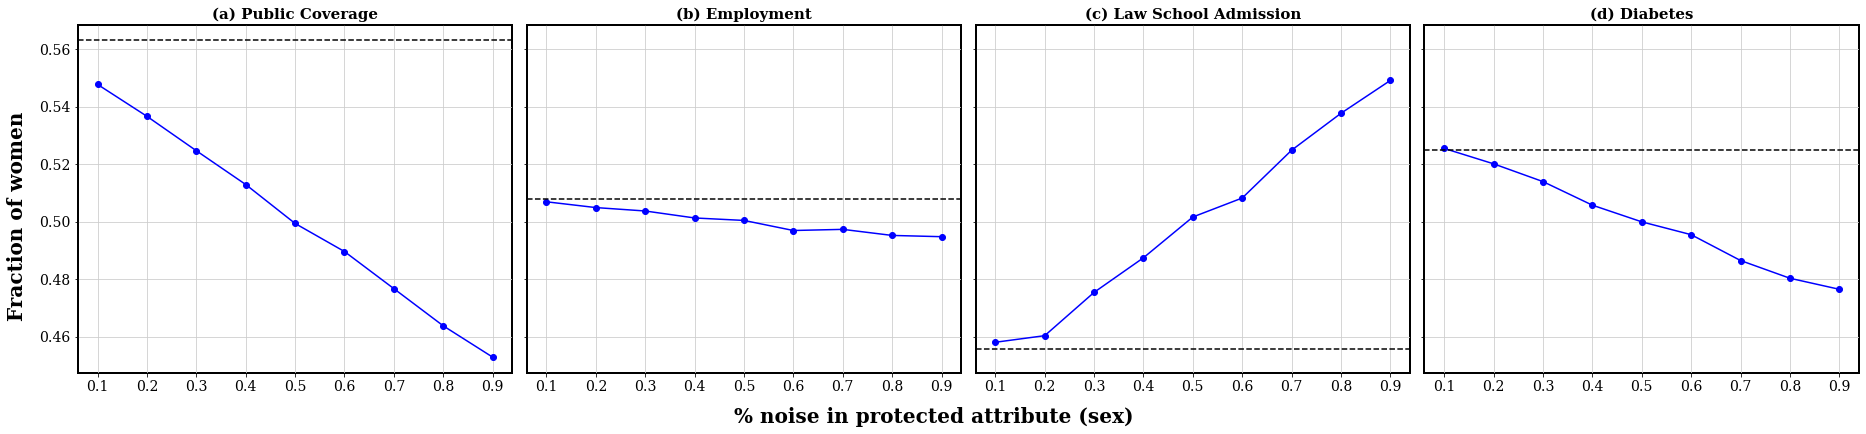

In [76]:
fig, axs = plt.subplots(1,4, sharey = True, figsize=(26, 6.1))

items  = ['publiccov_ca', 'employment_ca', 'law_school', 'diabetes']
titles = ['(a) Public Coverage', '(b) Employment', '(c) Law School Admission', '(d) Diabetes']

for ax,item,title in zip(axs.flatten(),items,titles):
        
    plt.rcParams["axes.grid"] = True
    
    ax = tdf[item].plot(color='blue', ax = ax, marker='o')
    v = zerodic[item]
    ax.axhline(y=v, color='black', linestyle='--')
    ax.xaxis.grid(True,which='both')
    ax.yaxis.grid(True,which='both')
    plt.xticks(visible = True)
    ax.tick_params(axis='y', which='both',labelsize=14)
    ax.tick_params(axis='x', which='both',labelsize=14)
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.set_title(title, fontsize=15,weight='bold')
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth(2)  
fig.supylabel('Fraction of women',fontsize=20,weight='bold', x = 0.005)
fig.supxlabel('% noise in protected attribute (sex)',fontsize=20,weight='bold', y = 0.02)
fig.tight_layout()
plt.savefig('../Fractionplot.pdf', pad_inches = 0,bbox_inches = "tight")
plt.show()